In [66]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('Doc_Consultation_Fee.xlsx')
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [4]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
data['Exper_year']=data['Experience'].str.replace('years experience','').astype('int64')
data.drop('Experience',axis=1,inplace=True)

In [7]:
data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [8]:
data['Rating'].fillna('0%',inplace=True)

In [9]:
data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [10]:
def rating(text):
    text=re.sub(r'%',' ',str(text))
    return text
data['Rating']=data['Rating'].apply(rating)
data['Rating']=data['Rating'].astype('int64')

In [11]:
data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [12]:
data['Place'].isnull().sum()

25

In [12]:
data["Place"].fillna("None",inplace=True)

In [13]:
data.Place.isnull().sum()

0

In [14]:
def place_data(text):
    text=str(text).lower()
    text=re.sub(r'[^a-z0-9]',' ',text)
    text=re.sub(r'\s',' ',text)
    return text
data['Place']=data['Place'].apply(place_data)

In [15]:
data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,"BHMS, MD - Homeopathy",100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",0,mathikere bel bangalore,ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [16]:
def qualifi_data(text):
    text=re.sub(r'[^a-z]',' ',str(text).lower())
    return text
data['Qualification']=data['Qualification'].apply(qualifi_data)

In [17]:
data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,NaN,300,9
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,bams,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [18]:
#data['Miscellaneous_Info'].fillna('NO Information',inplace=True)

In [19]:
def feed(feedback):
    feedback=re.findall(r'\d+ Feedback',str(feedback))
    if feedback==[]:
        feedback='0 Feedback'
        return feedback
    else:
        return feedback[0]
    
data['Number_Of_Feedback']=data['Miscellaneous_Info'].apply(feed)
data['Number_Of_Feedback']=data['Number_Of_Feedback'].str.replace('Feedback','')
data['Number_Of_Feedback']=data['Number_Of_Feedback'].astype('int64')

In [20]:
data.head()

,Qualification,Rating,Place,Profile,Miscellaneous_Info,Fees,Exper_year,Number_Of_Feedback
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,16
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,76
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,NaN,300,9,0
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,0
4,bams,100,keelkattalai chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,4


In [21]:
data.drop('Miscellaneous_Info',axis=1,inplace=True)

In [22]:
data.head()

,Qualification,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,100,24,16
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,350,12,76
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,300,9,0
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,250,12,0
4,bams,100,keelkattalai chennai,Ayurveda,250,20,4


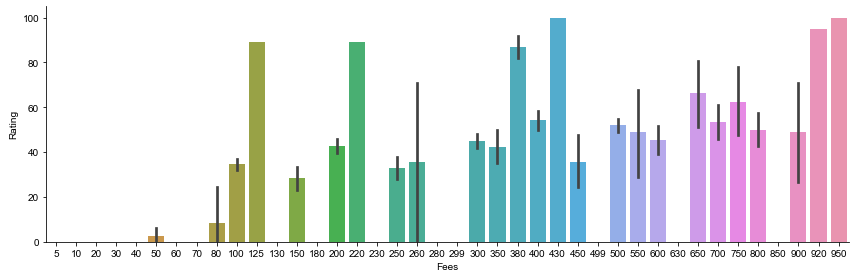

In [23]:
sns.catplot("Fees", "Rating", data=data.sort_values("Fees", ascending=False), kind="bar", height=4, aspect=3)
sns.set_style("whitegrid")
plt.show()

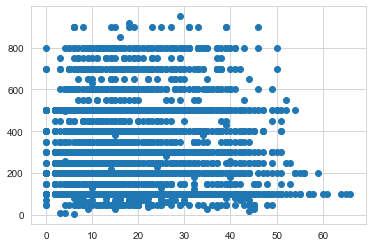

In [24]:
plt.scatter("Exper_year","Fees", data=data.sort_values("Exper_year", ascending=False))
plt.show()

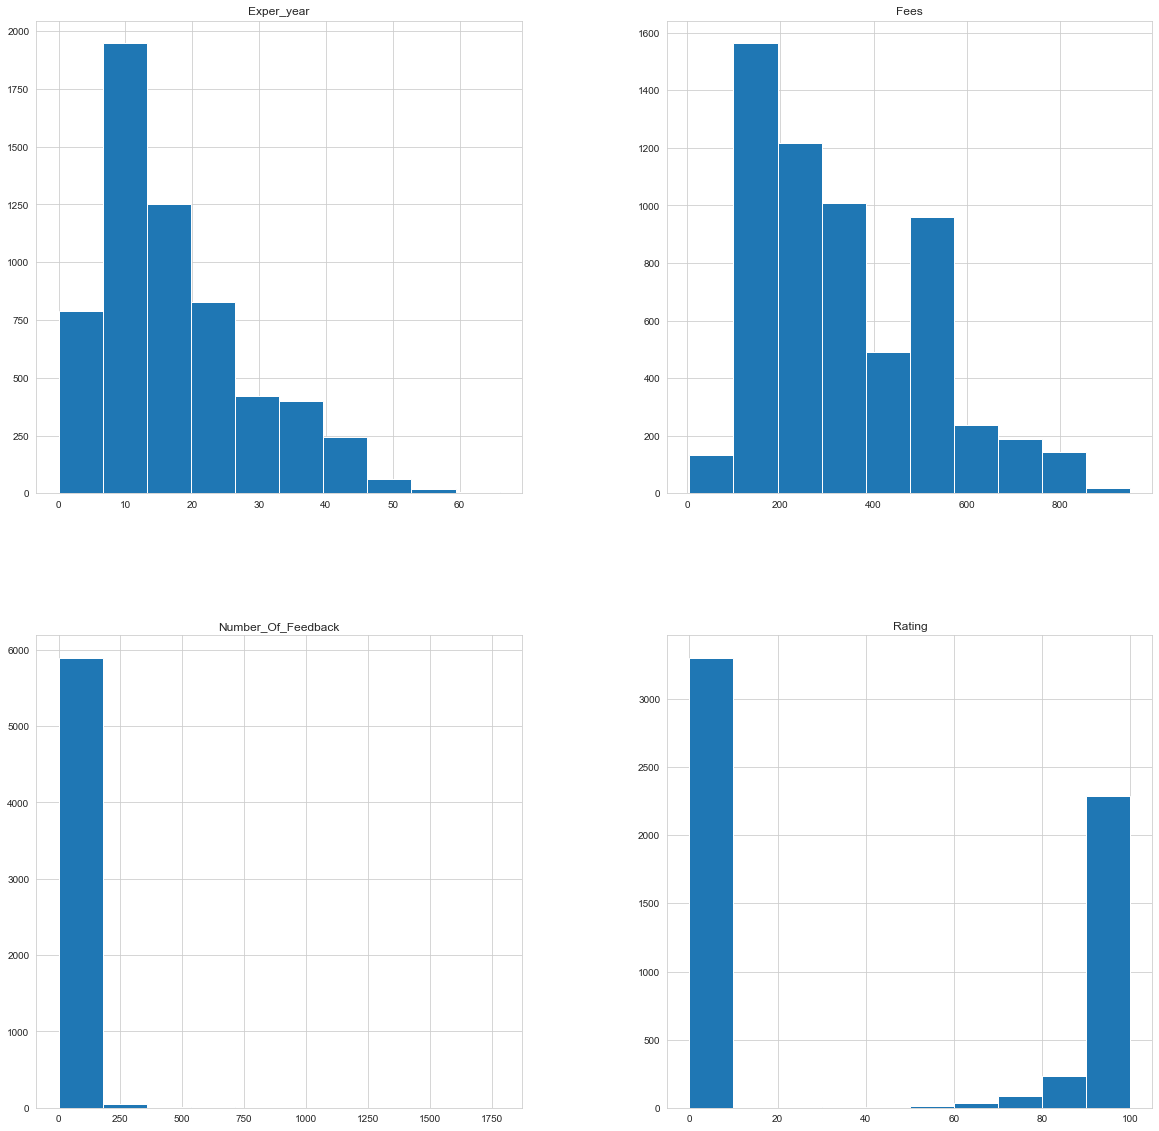

In [25]:
data.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28adfae3c88>,
 'caps': [<matplotlib.lines.Line2D at 0x28adfadac48>,
 'boxes': [<matplotlib.lines.Line2D at 0x28adfae3e88>],
 'medians': [<matplotlib.lines.Line2D at 0x28adccd93c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x28adfb0da08>],
 'means': []}

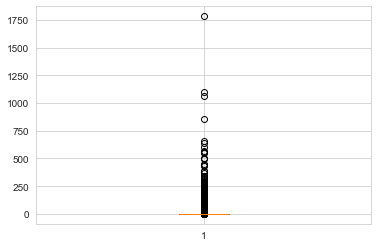

In [26]:
plt.boxplot(data['Number_Of_Feedback'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x28adfa75348>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x28adf9c5208>,
 'cmins': <matplotlib.collections.LineCollection at 0x28adfa75e88>,
 'cbars': <matplotlib.collections.LineCollection at 0x28adfadab08>}

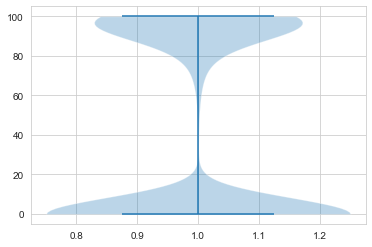

In [27]:
plt.violinplot(data['Rating'])

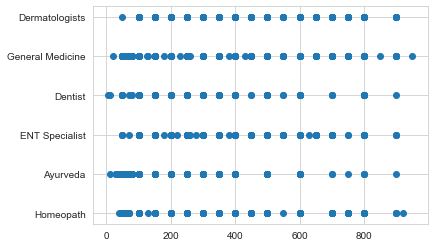

In [28]:
plt.scatter('Fees','Profile',data=data)

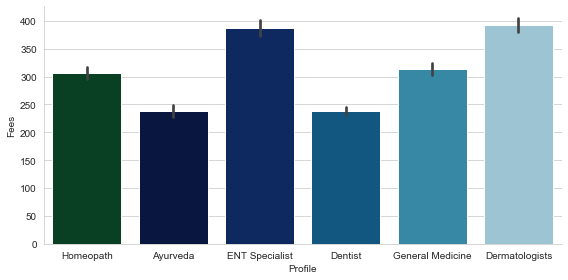

In [29]:
sns.catplot('Profile','Fees',data=data,palette='ocean',kind='bar', height=4, aspect=2)

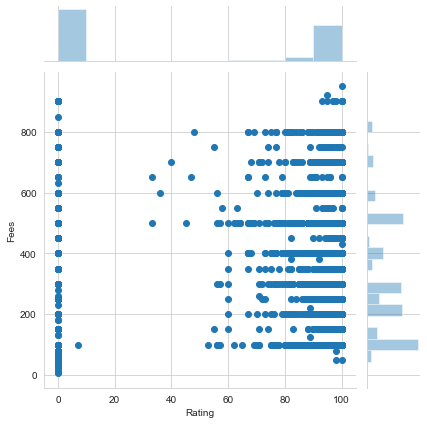

In [30]:
sns.jointplot('Rating','Fees',data=data,height=6,ratio=5,kind='scatter')

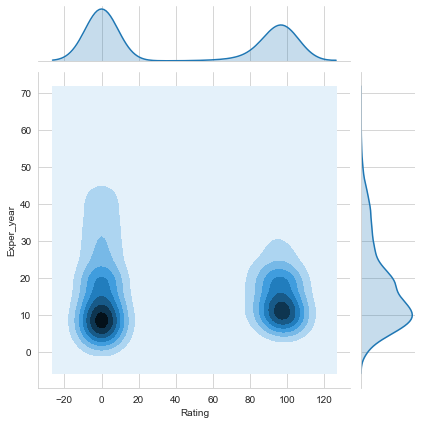

In [31]:
sns.jointplot('Rating','Exper_year',data=data,height=6,ratio=5,kind='kde')

In [32]:
data.head()

,Qualification,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback
0,bhms md homeopathy,100,kakkanad ernakulam,Homeopath,100,24,16
1,bams md ayurveda medicine,98,whitefield bangalore,Ayurveda,350,12,76
2,mbbs ms otorhinolaryngology,0,mathikere bel bangalore,ENT Specialist,300,9,0
3,bsc zoology bams,0,bannerghatta road bangalore,Ayurveda,250,12,0
4,bams,100,keelkattalai chennai,Ayurveda,250,20,4


In [33]:
data.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [34]:
Profile = data[["Profile"]]
Profile = pd.get_dummies(Profile, drop_first=True)
Profile.head()

,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [35]:
#profile show the Qualification almost so, I am going to drop the Qulification feature.
data.drop("Qualification", axis=1, inplace=True)

In [36]:
data.head()

,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback
0,100,kakkanad ernakulam,Homeopath,100,24,16
1,98,whitefield bangalore,Ayurveda,350,12,76
2,0,mathikere bel bangalore,ENT Specialist,300,9,0
3,0,bannerghatta road bangalore,Ayurveda,250,12,0
4,100,keelkattalai chennai,Ayurveda,250,20,4


In [37]:
data.Place.value_counts()

hsr layout  bangalore              75
andheri west  mumbai               70
dwarka  delhi                      67
banjara hills  hyderabad           64
mulund west  mumbai                54
                                   ..
cumballa hill  mumbai               1
nehru place  delhi                  1
kingsway camp  delhi                1
koramangala 8 block  bangalore      1
kallambalam  thiruvananthapuram     1
Name: Place, Length: 878, dtype: int64

In [42]:
def place(text):
    text = text.split()
    text = text[-1]
    return text

data["Place"]=data["Place"].apply(place)

In [43]:
data.head()

,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback
0,100,ernakulam,Homeopath,100,24,16
1,98,bangalore,Ayurveda,350,12,76
2,0,bangalore,ENT Specialist,300,9,0
3,0,bangalore,Ayurveda,250,12,0
4,100,chennai,Ayurveda,250,20,4


In [44]:
data.Place.value_counts()

bangalore             1258
mumbai                1219
delhi                 1185
hyderabad              951
chennai                855
coimbatore             228
ernakulam              153
thiruvananthapuram      86
none                    25
e                        1
Name: Place, dtype: int64

In [107]:
data["Place"] = data["Place"].replace({"none":"NaN"})

In [45]:
Place = data[["Place"]]
Place = pd.get_dummies(Place)
Place.head()

,Place_bangalore,Place_chennai,Place_coimbatore,Place_delhi,Place_e,Place_ernakulam,Place_hyderabad,Place_mumbai,Place_none,Place_thiruvananthapuram
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [46]:
Place.drop(["Place_none","Place_e"], axis=1, inplace=True)      # none have 25 null value that why i am droping and e is only one that why.

In [47]:
Place.head()

,Place_bangalore,Place_chennai,Place_coimbatore,Place_delhi,Place_ernakulam,Place_hyderabad,Place_mumbai,Place_thiruvananthapuram
0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


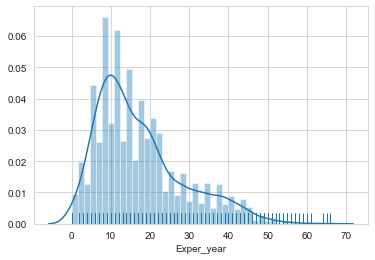

In [48]:
sns.distplot(data['Exper_year'],rug=True)

In [49]:
data = pd.concat([data, Profile, Place], axis=1)

In [50]:
data.head()

,Rating,Place,Profile,Fees,Exper_year,Number_Of_Feedback,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Place_bangalore,Place_chennai,Place_coimbatore,Place_delhi,Place_ernakulam,Place_hyderabad,Place_mumbai,Place_thiruvananthapuram
0,100,ernakulam,Homeopath,100,24,16,0,0,0,0,1,0,0,0,0,1,0,0,0
1,98,bangalore,Ayurveda,350,12,76,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,bangalore,ENT Specialist,300,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,bangalore,Ayurveda,250,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,100,chennai,Ayurveda,250,20,4,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
data.drop(["Place", "Profile"], axis=1, inplace=True)

In [52]:
data.head()

,Rating,Fees,Exper_year,Number_Of_Feedback,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Place_bangalore,Place_chennai,Place_coimbatore,Place_delhi,Place_ernakulam,Place_hyderabad,Place_mumbai,Place_thiruvananthapuram
0,100,100,24,16,0,0,0,0,1,0,0,0,0,1,0,0,0
1,98,350,12,76,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,300,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,250,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,100,250,20,4,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
data.describe()

,Rating,Fees,Exper_year,Number_Of_Feedback,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Place_bangalore,Place_chennai,Place_coimbatore,Place_delhi,Place_ernakulam,Place_hyderabad,Place_mumbai,Place_thiruvananthapuram
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,42.217245,307.944640,17.303976,10.373427,0.234357,0.173461,0.122127,0.196779,0.141419,0.211038,0.143432,0.038249,0.198792,0.025667,0.159537,0.204496,0.014427
std,47.340934,190.920373,11.142798,49.603087,0.423632,0.378677,0.327460,0.397597,0.348483,0.408080,0.350543,0.191812,0.399125,0.158153,0.366207,0.403367,0.119253
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,150.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,300.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,96.000000,500.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,950.000000,66.000000,1782.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [54]:
data.shape

(5961, 17)

In [55]:
data.columns

Index(['Rating', 'Fees', 'Exper_year', 'Number_Of_Feedback', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'Place_bangalore',
       'Place_chennai', 'Place_coimbatore', 'Place_delhi', 'Place_ernakulam',
       'Place_hyderabad', 'Place_mumbai', 'Place_thiruvananthapuram'],
      dtype='object')

In [57]:
X = data.loc[:,['Rating', 'Exper_year', 'Number_Of_Feedback', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'Place_bangalore',
       'Place_chennai', 'Place_coimbatore', 'Place_delhi', 'Place_ernakulam',
       'Place_hyderabad', 'Place_mumbai', 'Place_thiruvananthapuram']]

X.head()

,Rating,Exper_year,Number_Of_Feedback,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Place_bangalore,Place_chennai,Place_coimbatore,Place_delhi,Place_ernakulam,Place_hyderabad,Place_mumbai,Place_thiruvananthapuram
0,100,24,16,0,0,0,0,1,0,0,0,0,1,0,0,0
1,98,12,76,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,0,12,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,100,20,4,0,0,0,0,0,0,1,0,0,0,0,0,0


In [58]:
y = data.iloc[:,1]
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

(17.0, 0.0)

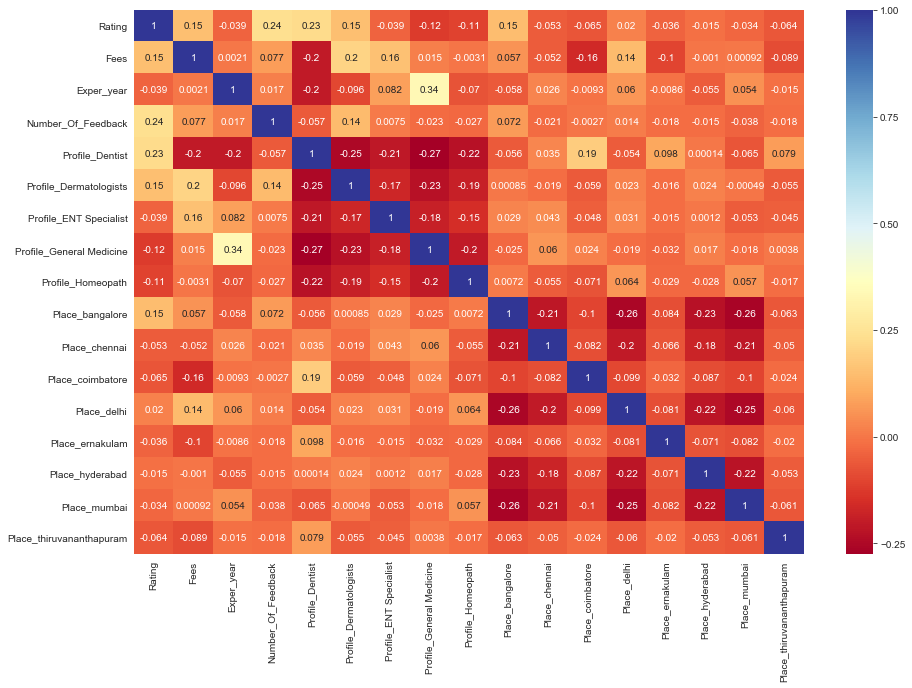

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(data.corr(), cmap="RdYlBu", annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [63]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
selection.feature_importances_

array([0.1728478 , 0.38129266, 0.15146936, 0.00992812, 0.05834083,
       0.05192075, 0.017166  , 0.02070234, 0.01423983, 0.01385007,
       0.0268872 , 0.03276554, 0.01000097, 0.01302563, 0.02081602,
       0.00474689])

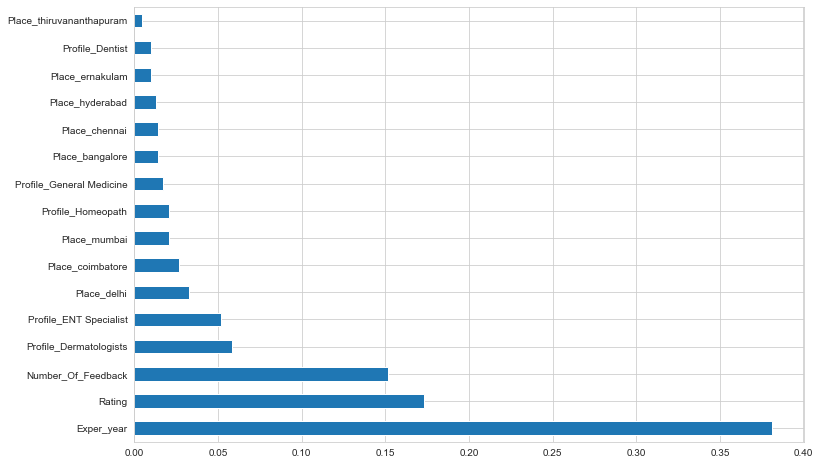

In [64]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
X = scale.transform(X)

In [78]:
X

array([[ 1.22066882,  0.60097885,  0.11344142, ..., -0.43568378,
        -0.50701532, -0.12098883],
       [ 1.17841853, -0.47604029,  1.32314503, ..., -0.43568378,
        -0.50701532, -0.12098883],
       [-0.89184525, -0.74529508, -0.20914621, ..., -0.43568378,
        -0.50701532, -0.12098883],
       ...,
       [ 1.15729339,  2.12675597,  0.01263279, ..., -0.43568378,
        -0.50701532, -0.12098883],
       [ 1.00941741, -0.20678551, -0.20914621, ..., -0.43568378,
         1.97232701, -0.12098883],
       [ 1.22066882, -0.02728232, -0.20914621, ..., -0.43568378,
        -0.50701532, -0.12098883]])

In [83]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

In [100]:
line_reg = LinearRegression()
line_reg.fit(X_train, y_train)
prediction = line_reg.predict(X_test)
print(r2_score(y_test, prediction))
print(mean_squared_error(y_test, prediction))
print(mean_absolute_error(y_test,prediction))

0.2109661861325417
29739.04434856159
134.87102939437025


In [101]:
svr = SVR()
svr.fit(X_train, y_train)
prediction = svr.predict(X_test)
print(r2_score(y_test, prediction))
print(mean_squared_error(y_test, prediction))
print(mean_absolute_error(y_test,prediction))

0.09606719323524482
34069.63980001554
140.9004542345367


In [102]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
prediction = rfr.predict(X_test)
print(r2_score(y_test, prediction))
print(mean_squared_error(y_test, prediction))
print(mean_absolute_error(y_test,prediction))

0.03594555063533478
36335.65193303603
144.149858428031


In [105]:
import pickle
pick = open("DoctorConsultation.pkl", 'wb')
pickle.dump(line_reg, pick)
pick.close()